In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
import tensorflow as  tf
import seaborn as sns

In [48]:
data=pd.read_csv('/content/drive/MyDrive/churn_codsoft/Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [21]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [23]:
data.columns.tolist()

['RowNumber',
 'CustomerId',
 'Surname',
 'CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

0    7963
1    2037
Name: Exited, dtype: int64

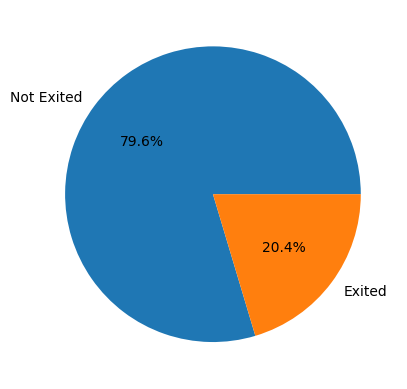

In [24]:
value_counts=data['Exited'].value_counts()
plt.pie(value_counts, labels=['Not Exited', 'Exited'], autopct='%1.1f%%')


value_counts

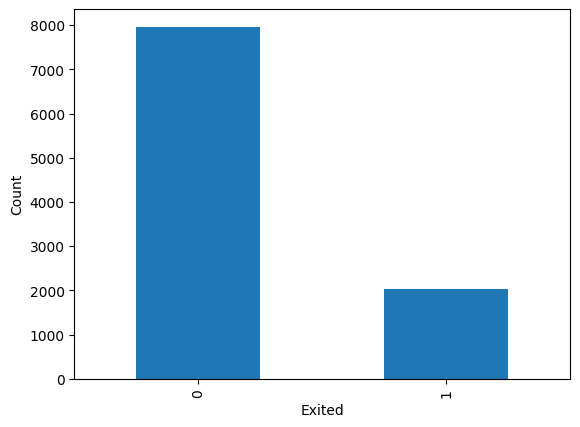

In [25]:
data['Exited'].value_counts().plot(kind='bar')
plt.xlabel('Exited')
plt.ylabel('Count')
plt.show()

In [49]:
data = data.drop(['RowNumber','CustomerId','Surname'] , axis=1)
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [50]:
data['Gender']=data['Gender'].apply(lambda x :  1 if x=='Male' else 0)
data['Gender']=data['Gender'].astype(int)

In [51]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['Geography'] = label_encoder.fit_transform(data['Geography'])
#data['Gender'] = label_encoder.fit_transform(data['Gender'])

In [52]:
X = data.drop('Exited',axis=1)
y = data['Exited']

In [53]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=20)

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

In [56]:
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)
logistic_regression_pred = logistic_regression_model.predict(X_test)

print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, logistic_regression_pred))
print("Classification Report:\n", classification_report(y_test, logistic_regression_pred))

Logistic Regression:
Accuracy: 0.803
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.98      0.89      1623
           1       0.36      0.06      0.10       377

    accuracy                           0.80      2000
   macro avg       0.59      0.52      0.49      2000
weighted avg       0.73      0.80      0.74      2000



In [58]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

print("Random Forests:")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("Classification Report:\n", classification_report(y_test, rf_pred))

Random Forests:
Accuracy: 0.8715
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.96      0.92      1623
           1       0.76      0.47      0.58       377

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.86      2000



In [59]:
predict=logistic_regression_model.predict(X_test)

In [60]:
from sklearn.metrics import confusion_matrix

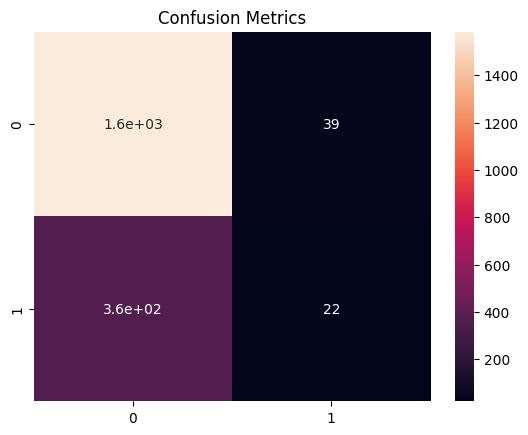

In [61]:
Cm=confusion_matrix(y_test,predict)
ax=plt.axes()
sns.heatmap(Cm, annot=True,
           annot_kws={'size':10},
           #xticklabels=labels,
           #yticklabels=labels,
            ax=ax
           )

plt.title("Confusion Metrics")
plt.show()

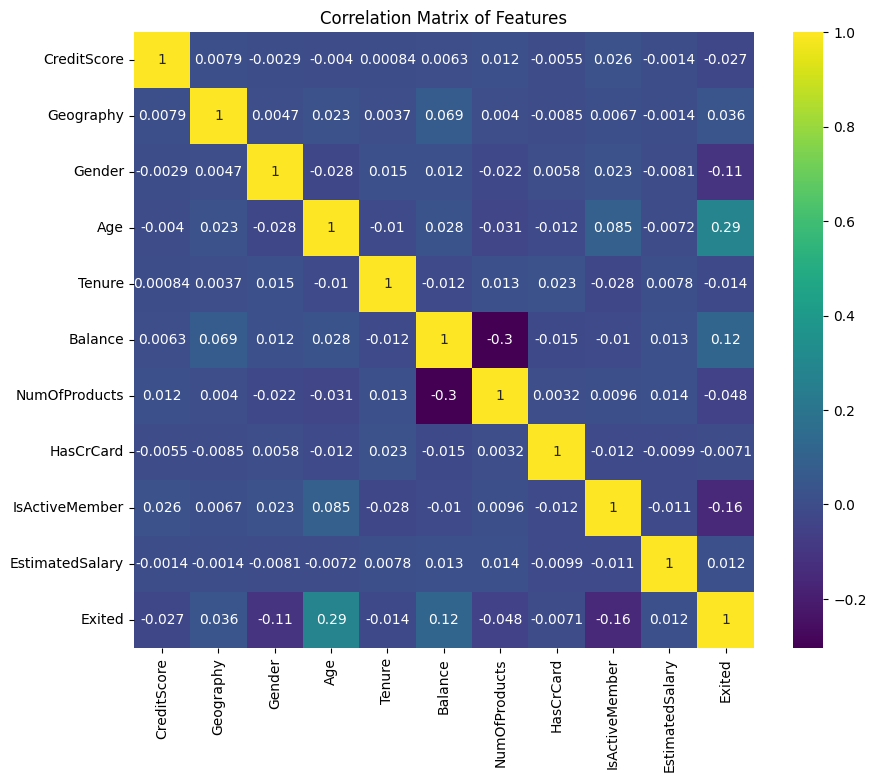

In [63]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='viridis')
plt.title('Correlation Matrix of Features')
plt.show()